# Getting Started

In [134]:
import pandas as pd

In [135]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [136]:
from sklearn import tree

In [137]:
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

In [138]:
from sklearn.decomposition import PCA

In [139]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Load in data

In [140]:
df1 = pd.read_csv('resample1.csv')
df1

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,1390,801717B00,15461,802ED3AC0,1184.60,Euro,1184.60,Euro,Credit Card,0
1,215820,8088DA970,23726,80EDA5E40,16505.05,Euro,16505.05,Euro,Credit Card,0
2,22129,8070C98A0,22129,8070C98A0,1860.27,Euro,2179.84,US Dollar,ACH,0
3,1291,800245AD0,21939,800F36730,6.45,US Dollar,6.45,US Dollar,Credit Card,0
4,1110,8075299E0,118314,80B84CB60,3698.17,US Dollar,3698.17,US Dollar,Cheque,0
...,...,...,...,...,...,...,...,...,...,...
7125,21939,812C4D330,41215,812C4D420,3858.79,US Dollar,3858.79,US Dollar,ACH,1
7126,233465,814A02750,33219,814A02890,2788.77,US Dollar,2788.77,US Dollar,ACH,1
7127,7839,807780F40,14652,8077814E0,1168.38,Euro,1168.38,Euro,ACH,1
7128,216208,814C44D60,3460,814C44DB0,2285.86,Euro,2285.86,Euro,ACH,1


In [141]:
df2 = pd.read_csv('resample6.csv')
df2

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,285,80AFBCDD0,285,80AFE9350,4459.58,Ruble,4459.58,Ruble,Cheque,0
1,5572,8021724B0,223113,80A30FCC0,898.60,US Dollar,898.60,US Dollar,Cheque,0
2,1277,8016D6C00,2175,806B60600,17522.96,US Dollar,17522.96,US Dollar,Cheque,0
3,216093,80F240F10,49308,8160F3420,13167.22,US Dollar,13167.22,US Dollar,Credit Card,0
4,13821,80FF34A60,139884,810A96C50,200.45,US Dollar,200.45,US Dollar,Cash,0
...,...,...,...,...,...,...,...,...,...,...
14255,25400,80903FD90,117861,81197E2F0,2878.33,Euro,2878.33,Euro,ACH,1
14256,269312,81AD3C841,170566,81AD3E951,0.31,Bitcoin,0.31,Bitcoin,Bitcoin,1
14257,164730,8192F2D20,164730,818A159A0,8994.68,Saudi Riyal,8994.68,Saudi Riyal,ACH,1
14258,20,808A89670,21939,808A89CF0,1332.68,US Dollar,1332.68,US Dollar,ACH,1


In [142]:
df2['Is Laundering'].value_counts()

Is Laundering
0    7130
1    7130
Name: count, dtype: int64

In [143]:
df3 = pd.read_csv('resample7.csv')
df3['Is Laundering'].value_counts()

Is Laundering
0    5092
1    5092
Name: count, dtype: int64

In [144]:
df4 = pd.read_csv('resample8.csv')
df4['Is Laundering'].value_counts()

Is Laundering
0    11883
1    11883
Name: count, dtype: int64

# Dummy Variables

In [145]:
# first, we need dummy variables
# https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html 
categories = ['From Bank', 'To Bank', 'Account', 'Account.1', 'Payment Currency', 'Receiving Currency', 'Payment Format']
prefixes = {}
for i in categories:
    prefixes[i] = 'Is_'+i.replace(' ', '_')
print(prefixes)

{'From Bank': 'Is_From_Bank', 'To Bank': 'Is_To_Bank', 'Account': 'Is_Account', 'Account.1': 'Is_Account.1', 'Payment Currency': 'Is_Payment_Currency', 'Receiving Currency': 'Is_Receiving_Currency', 'Payment Format': 'Is_Payment_Format'}


In [146]:
df1_dummy = pd.get_dummies(data=df1, prefix=prefixes, drop_first=True, dtype=int, columns=categories)
df1_dummy

,Amount Received,Amount Paid,Is Laundering,Is_From_Bank_1,Is_From_Bank_2,Is_From_Bank_3,Is_From_Bank_4,Is_From_Bank_5,Is_From_Bank_7,Is_From_Bank_8,...,Is_Receiving_Currency_UK Pound,Is_Receiving_Currency_US Dollar,Is_Receiving_Currency_Yen,Is_Receiving_Currency_Yuan,Is_Payment_Format_Bitcoin,Is_Payment_Format_Cash,Is_Payment_Format_Cheque,Is_Payment_Format_Credit Card,Is_Payment_Format_Reinvestment,Is_Payment_Format_Wire
0,1184.60,1184.60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,16505.05,16505.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1860.27,2179.84,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.45,6.45,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,3698.17,3698.17,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,3858.79,3858.79,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7126,2788.77,2788.77,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7127,1168.38,1168.38,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7128,2285.86,2285.86,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df2_dummy = pd.get_dummies(data=df2, prefix=prefixes, drop_first=True, dtype=int, columns=categories)

In [148]:
df2_dummy

,Amount Received,Amount Paid,Is Laundering,Is_From_Bank_1,Is_From_Bank_2,Is_From_Bank_3,Is_From_Bank_4,Is_From_Bank_5,Is_From_Bank_7,Is_From_Bank_8,...,Is_Receiving_Currency_UK Pound,Is_Receiving_Currency_US Dollar,Is_Receiving_Currency_Yen,Is_Receiving_Currency_Yuan,Is_Payment_Format_Bitcoin,Is_Payment_Format_Cash,Is_Payment_Format_Cheque,Is_Payment_Format_Credit Card,Is_Payment_Format_Reinvestment,Is_Payment_Format_Wire
0,4459.58,4459.58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,898.60,898.60,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,17522.96,17522.96,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,13167.22,13167.22,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,200.45,200.45,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14255,2878.33,2878.33,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14256,0.31,0.31,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14257,8994.68,8994.68,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14258,1332.68,1332.68,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [149]:
df3_dummy = pd.get_dummies(data=df3, prefix=prefixes, columns=categories, drop_first=True, dtype=int)

In [150]:
df3_dummy

,Amount Received,Amount Paid,Is Laundering,Is_From_Bank_1,Is_From_Bank_2,Is_From_Bank_3,Is_From_Bank_4,Is_From_Bank_5,Is_From_Bank_7,Is_From_Bank_8,...,Is_Receiving_Currency_UK Pound,Is_Receiving_Currency_US Dollar,Is_Receiving_Currency_Yen,Is_Receiving_Currency_Yuan,Is_Payment_Format_Bitcoin,Is_Payment_Format_Cash,Is_Payment_Format_Cheque,Is_Payment_Format_Credit Card,Is_Payment_Format_Reinvestment,Is_Payment_Format_Wire
0,4459.58,4459.58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,898.60,898.60,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,17522.96,17522.96,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,13167.22,13167.22,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,200.45,200.45,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10179,161763.36,161763.36,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10180,3282.90,3282.90,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10181,3036.31,3036.31,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10182,11743.05,11743.05,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df4_dummy = pd.get_dummies(data=df4, prefix=prefixes, columns=categories, dtype=int, drop_first=True)
df4_dummy

,Amount Received,Amount Paid,Is Laundering,Is_From_Bank_1,Is_From_Bank_2,Is_From_Bank_3,Is_From_Bank_4,Is_From_Bank_5,Is_From_Bank_7,Is_From_Bank_8,...,Is_Receiving_Currency_UK Pound,Is_Receiving_Currency_US Dollar,Is_Receiving_Currency_Yen,Is_Receiving_Currency_Yuan,Is_Payment_Format_Bitcoin,Is_Payment_Format_Cash,Is_Payment_Format_Cheque,Is_Payment_Format_Credit Card,Is_Payment_Format_Reinvestment,Is_Payment_Format_Wire
0,4459.58,4459.58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,898.60,898.60,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,17522.96,17522.96,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,13167.22,13167.22,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,200.45,200.45,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23761,6963.61,6963.61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23762,912.13,912.13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23763,3380.81,3380.81,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23764,12116.89,12116.89,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

In [19]:
lr = LogisticRegression(solver='liblinear')
skf = StratifiedKFold()

In [61]:
lr_reports = []

In [21]:
def train_logistic(train, test):
    x_train = train.loc[:, train.columns != 'Is Laundering']
    y_train = train['Is Laundering']
    x_test = test.loc[:, test.columns != 'Is Laundering']
    y_test = test['Is Laundering']
    lr.fit(x_train, y_train)
    predicted = lr.predict(x_test)
    report = classification_report(y_test, predicted)
    lr_reports.append(report)

In [58]:
def cross_validate_lr(data):
    x = data.iloc[:, data.columns != 'Is Laundering']
    y = data['Is Laundering']
    for train_i, test_i in skf.split(x, y):
        train = data.loc[train_i,:]
        test = data.loc[test_i,:]
        train_logistic(train, test)

In [62]:
cross_validate_lr(df1_dummy)

In [63]:
# trying logistic regression on df2
cross_validate_lr(df2_dummy)

In [65]:
cross_validate_lr(df3_dummy)

In [74]:
cross_validate_lr(df4_dummy)

In [75]:
# results from df2 logistic regression
for i in lr_reports:
    print(i)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       713
           1       0.51      1.00      0.67       713

    accuracy                           0.51      1426
   macro avg       0.75      0.51      0.36      1426
weighted avg       0.75      0.51      0.36      1426

              precision    recall  f1-score   support

           0       1.00      0.01      0.03       713
           1       0.50      1.00      0.67       713

    accuracy                           0.51      1426
   macro avg       0.75      0.51      0.35      1426
weighted avg       0.75      0.51      0.35      1426

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       713
           1       0.50      1.00      0.67       713

    accuracy                           0.51      1426
   macro avg       0.75      0.51      0.35      1426
weighted avg       0.75      0.51      0.35      1426

              preci

# Decision Tree

In [28]:
dt = tree.DecisionTreeClassifier()
dt_reports = []

In [29]:
def train_decision_tree(train, test):
    x_train = train.loc[:, train.columns != 'Is Laundering']
    y_train = train['Is Laundering']
    x_test = test.loc[:, test.columns != 'Is Laundering']
    y_test = test['Is Laundering']
    dt.fit(x_train, y_train)
    predicted = dt.predict(x_test)
    dt_reports.append(classification_report(y_test, predicted))

In [30]:
def cross_validate_dt(data):
    x = data.loc[:, data.columns != 'Is Laundering']
    y = data['Is Laundering']
    for train_i, test_i in skf.split(x, y):
        train = data.loc[train_i]
        test = data.loc[test_i]
        train_decision_tree(train, test)

In [31]:
# decision tree on df1
cross_validate_dt(df1_dummy)

In [32]:
# decision tree on df2
cross_validate_dt(data=df2_dummy)

In [71]:
cross_validate_dt(data=df3_dummy)

In [76]:
cross_validate_dt(data=df4_dummy)

[Text(0.6262481024916248, 0.9965753424657534, 'x[0] <= 947.885\ngini = 0.5\nsamples = 11408\nvalue = [5704, 5704]'),
 Text(0.3658396147403685, 0.9897260273972602, 'x[26] <= 0.5\ngini = 0.408\nsamples = 3532\nvalue = [2523, 1009]'),
 Text(0.30522403685092125, 0.9828767123287672, 'x[22639] <= 0.5\ngini = 0.276\nsamples = 2752\nvalue = [2296, 456]'),
 Text(0.2762772194304858, 0.976027397260274, 'x[22640] <= 0.5\ngini = 0.345\nsamples = 2057\nvalue = [1602, 455]'),
 Text(0.22843383584589616, 0.9691780821917808, 'x[0] <= 179.865\ngini = 0.433\nsamples = 1431\nvalue = [977, 454]'),
 Text(0.14279731993299832, 0.9623287671232876, 'x[1] <= 0.669\ngini = 0.305\nsamples = 883\nvalue = [717, 166]'),
 Text(0.12060301507537688, 0.9554794520547946, 'x[0] <= 0.107\ngini = 0.454\nsamples = 302\nvalue = [197, 105]'),
 Text(0.10552763819095477, 0.9486301369863014, 'x[1] <= 0.043\ngini = 0.229\nsamples = 152\nvalue = [132, 20]'),
 Text(0.09547738693467336, 0.9417808219178082, 'x[22439] <= 0.5\ngini = 0.11

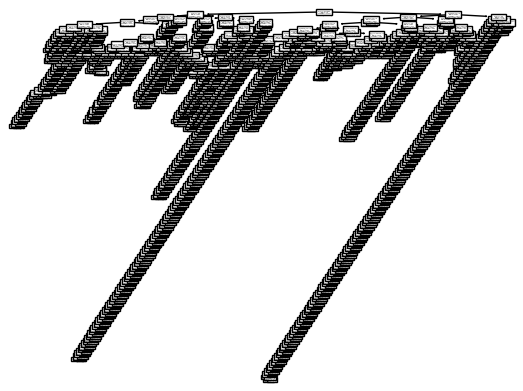

In [69]:
tree.plot_tree(dt)

In [77]:
for i in dt_reports:
    print(i)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       713
           1       0.85      0.93      0.89       713

    accuracy                           0.88      1426
   macro avg       0.89      0.88      0.88      1426
weighted avg       0.89      0.88      0.88      1426

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       713
           1       0.85      0.95      0.90       713

    accuracy                           0.89      1426
   macro avg       0.90      0.89      0.89      1426
weighted avg       0.90      0.89      0.89      1426

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       713
           1       0.87      0.93      0.90       713

    accuracy                           0.89      1426
   macro avg       0.89      0.89      0.89      1426
weighted avg       0.89      0.89      0.89      1426

              preci

# Gradient Boost

In [39]:
gb = lgb.LGBMClassifier(num_leaves=8, objective='binary')
gb_reports = []

In [43]:
def train_gradient_boost(train, test):
    x_train = train.loc[:, train.columns != 'Is Laundering']
    y_train = train['Is Laundering']
    x_test = test.loc[:, test.columns != 'Is Laundering']
    y_test = test['Is Laundering']
    gb.fit(x_train, y_train)
    predicted = gb.predict(x_test)
    gb_reports.append(classification_report(y_test, predicted))

In [44]:
def cross_validate_gb(data):
    x = data.loc[:, data.columns != 'Is Laundering']
    y = data['Is Laundering']
    for train_i, test_i in skf.split(x, y):
        train = data.loc[train_i]
        test = data.loc[test_i]
        train_gradient_boost(train, test)

In [45]:
cross_validate_gb(data=df1_dummy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2852, number of negative: 2852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 5704, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2852, number of negative: 2852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 5704, number of use

In [48]:
cross_validate_gb(df2_dummy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5704, number of negative: 5704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 11408, number of used features: 263
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5704, number of negative: 5704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 11408, number o

In [67]:
cross_validate_gb(df3_dummy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4074, number of negative: 4073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 8147, number of used features: 155
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500061 -> initscore=0.000245
[LightGBM] [Info] Start training from score 0.000245
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4074, number of negative: 4073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

In [78]:
cross_validate_gb(df4_dummy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9506, number of negative: 9506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1512
[LightGBM] [Info] Number of data points in the train set: 19012, number of used features: 503
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9507, number of negative: 9506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1492
[LightGBM

In [79]:
for i in gb_reports:
    print(i)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       713
           1       0.84      0.96      0.90       713

    accuracy                           0.89      1426
   macro avg       0.90      0.89      0.89      1426
weighted avg       0.90      0.89      0.89      1426

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       713
           1       0.85      0.97      0.90       713

    accuracy                           0.90      1426
   macro avg       0.91      0.90      0.90      1426
weighted avg       0.91      0.90      0.90      1426

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       713
           1       0.86      0.97      0.91       713

    accuracy                           0.91      1426
   macro avg       0.91      0.91      0.91      1426
weighted avg       0.91      0.91      0.91      1426

              preci

# Ada Boost

In [80]:
ada = AdaBoostClassifier(random_state=42)
ada_reports = []

In [81]:
def train_ada_boost(train, test):
    x_train = train.loc[:, train.columns != 'Is Laundering']
    y_train = train['Is Laundering']
    x_test = test.loc[:, test.columns != 'Is Laundering']
    y_test = test['Is Laundering']
    ada.fit(x_train, y_train)
    predicted = ada.predict(x_test)
    ada_reports.append(classification_report(y_test, predicted))

In [82]:
def cross_validate_ada(data):
    x = data.loc[:, data.columns != 'Is Laundering']
    y = data['Is Laundering']
    for train_i, test_i in skf.split(x, y):
        train = data.loc[train_i]
        test = data.loc[test_i]
        train_ada_boost(train, test)

In [83]:
cross_validate_ada(df1_dummy)

In [93]:
cross_validate_ada(df2_dummy)

In [94]:
cross_validate_ada(df3_dummy)

In [95]:
cross_validate_ada(df4_dummy)

In [96]:
for i in ada_reports:
    print(i)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       713
           1       0.84      0.92      0.88       713

    accuracy                           0.87      1426
   macro avg       0.87      0.87      0.87      1426
weighted avg       0.87      0.87      0.87      1426

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       713
           1       0.83      0.96      0.89       713

    accuracy                           0.88      1426
   macro avg       0.89      0.88      0.88      1426
weighted avg       0.89      0.88      0.88      1426

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       713
           1       0.85      0.93      0.89       713

    accuracy                           0.88      1426
   macro avg       0.88      0.88      0.88      1426
weighted avg       0.88      0.88      0.88      1426

              preci

# Hyperparameter Tuning

In [172]:
gb = lgb.LGBMClassifier(num_leaves=16, objective='binary')
cross_validate_gb(df1_dummy)
cross_validate_gb(df2_dummy)
cross_validate_gb(df3_dummy)
cross_validate_gb(df4_dummy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2852, number of negative: 2852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 5704, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2852, number of negative: 2852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 5704, number of use

In [166]:
def view_gb_reports(a, b):
    if a < 0 or a > len(gb_reports) or b < 0 or b > len(gb_reports) or a > b:
        print('bad')
        return
    for i in range(a, b):
        print(gb_reports[i])

In [174]:
view_gb_reports(len(gb_reports)-20, len(gb_reports))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       713
           1       0.84      0.96      0.89       713

    accuracy                           0.89      1426
   macro avg       0.90      0.89      0.89      1426
weighted avg       0.90      0.89      0.89      1426

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       713
           1       0.85      0.96      0.90       713

    accuracy                           0.90      1426
   macro avg       0.91      0.90      0.90      1426
weighted avg       0.91      0.90      0.90      1426

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       713
           1       0.87      0.97      0.91       713

    accuracy                           0.91      1426
   macro avg       0.92      0.91      0.91      1426
weighted avg       0.92      0.91      0.91      1426

              preci

In [175]:
gb.n_features_in_

31783

In [177]:
gb.feature_name_

['Amount_Received',
 'Amount_Paid',
 'Is_From_Bank_1',
 'Is_From_Bank_2',
 'Is_From_Bank_3',
 'Is_From_Bank_4',
 'Is_From_Bank_5',
 'Is_From_Bank_7',
 'Is_From_Bank_8',
 'Is_From_Bank_10',
 'Is_From_Bank_11',
 'Is_From_Bank_12',
 'Is_From_Bank_13',
 'Is_From_Bank_14',
 'Is_From_Bank_15',
 'Is_From_Bank_16',
 'Is_From_Bank_17',
 'Is_From_Bank_18',
 'Is_From_Bank_19',
 'Is_From_Bank_20',
 'Is_From_Bank_23',
 'Is_From_Bank_24',
 'Is_From_Bank_25',
 'Is_From_Bank_26',
 'Is_From_Bank_27',
 'Is_From_Bank_29',
 'Is_From_Bank_70',
 'Is_From_Bank_72',
 'Is_From_Bank_110',
 'Is_From_Bank_112',
 'Is_From_Bank_113',
 'Is_From_Bank_115',
 'Is_From_Bank_116',
 'Is_From_Bank_118',
 'Is_From_Bank_210',
 'Is_From_Bank_211',
 'Is_From_Bank_212',
 'Is_From_Bank_213',
 'Is_From_Bank_214',
 'Is_From_Bank_215',
 'Is_From_Bank_216',
 'Is_From_Bank_217',
 'Is_From_Bank_219',
 'Is_From_Bank_224',
 'Is_From_Bank_285',
 'Is_From_Bank_349',
 'Is_From_Bank_394',
 'Is_From_Bank_423',
 'Is_From_Bank_425',
 'Is_From_

In [176]:
gb.feature_importances_

array([138,  97,   1, ...,  64,  60,  49])

In [179]:
gb.n_features_

31783

In [180]:
feat = {}
for i in range(gb.n_features_):
    feat[gb.feature_name_[i]] = gb.feature_importances_[i]

KeyboardInterrupt: 